In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge 
import matplotlib.pyplot as plt

In [2]:
# Importing libraries above 

In [3]:
# Importing datasets

In [4]:
traindf = pd.read_csv('/Users/RajHoOT/Downloads/train (2).csv', index_col = 'Id')
testdf = pd.read_csv('/Users/RajHoOT/Downloads/test.csv', index_col = 'Id')

In [5]:
# Making things a little easier for me with column names/spaces/capitals

In [6]:
traindf.columns = [x.lower().replace(' ', '_') for x in traindf.columns]

In [7]:
testdf.columns = [x.lower().replace(' ', '_') for x in testdf.columns]

In [8]:
print(traindf.columns)
print(testdf.columns)

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [9]:
#Checking the shape of both dataframes. I can see that one has an extra feature, which is "Sale Price"
print(traindf.shape)
print(testdf.shape)

(2051, 80)
(879, 79)


In [10]:
#checking head of my tran dataset 
traindf.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
# checking the head of my test dataframe 
testdf.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [12]:
traindf.info() # checkign all the different types of data types and how many values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         2051 non-null object
roof_matl          2

In [13]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 79 columns):
pid                879 non-null int64
ms_subclass        879 non-null int64
ms_zoning          879 non-null object
lot_frontage       719 non-null float64
lot_area           879 non-null int64
street             879 non-null object
alley              58 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_matl          879 non-null object
e

In [14]:
#see more statistical details 
traindf.describe()

,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [15]:
testdf.describe()

,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,...,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,...,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [16]:
testdf.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [17]:
traindf.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [18]:
#from a previous build, I know that my target = sale price. I am checking to see the specific data of that column

traindf['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [19]:
# Filling in some NAN values with floats. Needed a bit of help here to understand how to do this properly. 
# I know you could add up the columns after this for a total square feet, may attempt if time. 

traindf['bsmtfin_sf_1'].fillna(0.0, inplace=True)
traindf['bsmtfin_sf_2'].fillna(0.0, inplace=True)
traindf['1st_flr_sf'].fillna(0.0, inplace=True)
traindf['2nd_flr_sf'].fillna(0.0, inplace=True)
traindf['garage_area'].fillna(0.0, inplace=True)
testdf['bsmtfin_sf_1'].fillna(0.0, inplace=True)
testdf['bsmtfin_sf_2'].fillna(0.0, inplace=True)
testdf['1st_flr_sf'].fillna(0.0, inplace=True)
testdf['2nd_flr_sf'].fillna(0.0, inplace=True)
testdf['garage_area'].fillna(0.0, inplace=True)

In [20]:
traindf['total_sq_ft'] = pd.DataFrame(traindf['bsmtfin_sf_1'] + 
                                            traindf['bsmtfin_sf_2'] + 
                                            traindf['1st_flr_sf'] + 
                                            traindf['2nd_flr_sf'])

# adding up the indoor square space into one feature

In [21]:
traindf.head() #checking to make sure columns were added correctly

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sq_ft
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,2012.0
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,2759.0
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,1788.0
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,1444.0
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,1445.0


In [22]:
# Doing the same thing from above to the test dataset 

testdf['total_sq_ft'] = pd.DataFrame(testdf['bsmtfin_sf_1'] + testdf['bsmtfin_sf_2'] + testdf['1st_flr_sf'] + testdf['2nd_flr_sf'])

In [23]:
testdf.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,total_sq_ft
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,1928.0
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2006,WD,1967.0
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,New,2050.0
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,968.0
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,185,0,NaN,NaN,NaN,0,7,2009,WD,2003.0


/Users/RajHoOT/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


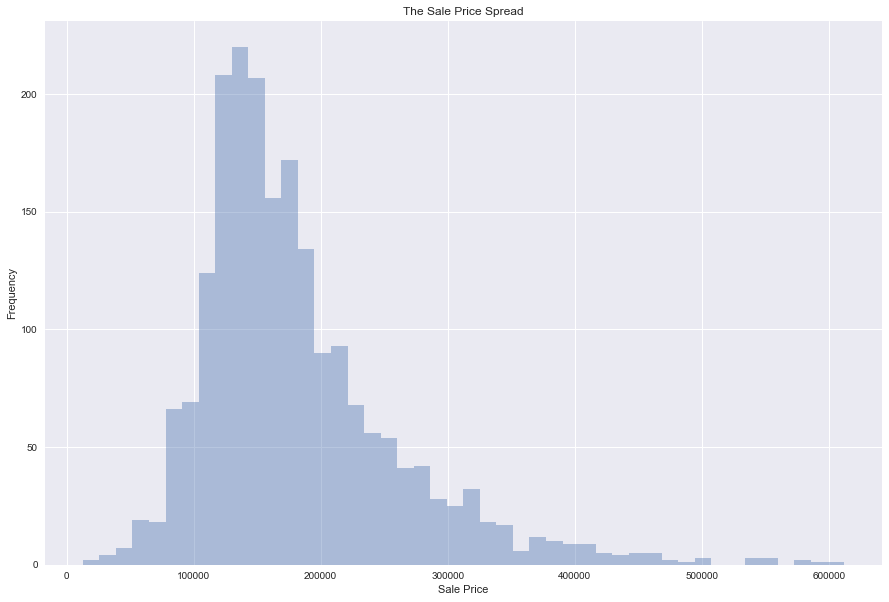

In [24]:
#Histogram of saleprice

import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.figure(figsize = (15,10))
sns.distplot(traindf['saleprice'], kde = False)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('The Sale Price Spread');

In [25]:
# The histogram is skewed right which means less people can afford higher cost homes 

/Users/RajHoOT/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


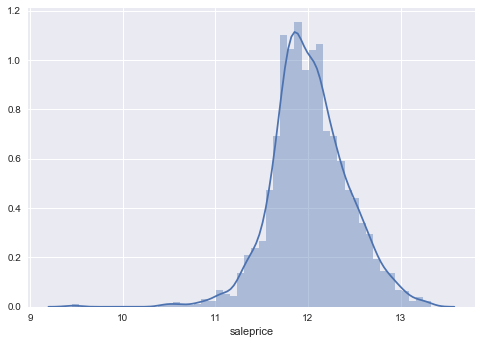

In [26]:
sns.distplot(np.log(traindf['saleprice']));

In [27]:
#Log of sale price is more normal 

In [28]:
# FEATURE SELECTION 

In [29]:
#Correlation

In [30]:
traindf.corr()[['saleprice']].apply(abs).sort_values('saleprice', ascending = False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
total_sq_ft,0.718935
gr_liv_area,0.697038
garage_area,0.649897
garage_cars,0.648220
total_bsmt_sf,0.628925
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370


In [31]:
# I can see from here that my two best features are overall quality and total square feet. I will be using those as my features 

In [32]:
qual_feat = traindf.pivot_table(index='overall_qual', 
                                values='saleprice', aggfunc=np.median)

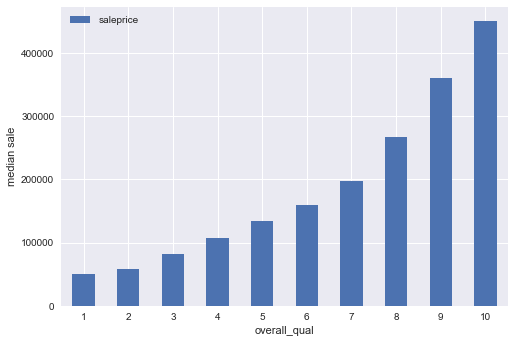

In [33]:
qual_feat.plot(kind='bar')
plt.xlabel('overall_qual')
plt.ylabel('median sale')
plt.xticks(rotation=0)
plt.show()

In [34]:
#Dealing with the null values 
null_values = pd.DataFrame(traindf.isnull().sum().sort_values(ascending=False)[:30])

In [35]:
null_values.columns = ['Nulls']

In [36]:
null_values

,Nulls
pool_qc,2042
misc_feature,1986
alley,1911
fence,1651
fireplace_qu,1000
lot_frontage,330
garage_finish,114
garage_yr_blt,114
garage_cond,114
garage_qual,114


In [37]:

traindf = traindf.fillna({
   'pool_qc': 'none',
   'misc_feature': 'none',
   'alley': 'none',
   'fence': 'none',
   'fireplace_qu': 'none',
   'lot_frontage': 0.0,
   'garage_finish' : '0.0',
   'garage_yr_blt' : 'none',
   'garage_cond' : 'none',
   'garage_qual' : 'none',
   'garage_type' : 'none',
   'bsmt_exposure' : 'none',
   'bsmtfin_type_2' : 'none',
   'bsmt_cond' : 'none',
   'bsmt_qual' : 'none',
   'bsmtfin_type_1' : 'none',
   'mas_vnr_type' : 'none',
   'mas_vnr_area' : 'none',
   'bsmt_half_bath' : 'none',
   'bsmt_full_bath' : 'none',
   'bsmt_unf_sf' : 0,
   'garage_cars' : 0,
   'total_bsmt_sf' : 0,
})

In [38]:
testdf = testdf.fillna({
   'pool_qc': 'none',
   'misc_feature': 'none',
   'alley': 'none',
   'fence': 'none',
   'fireplace_qu': 'none',
   'lot_frontage': 0.0,
   'garage_finish' : '0.0',
   'garage_yr_blt' : 'none',
   'garage_cond' : 'none',
   'garage_qual' : 'none',
   'garage_type' : 'none',
   'bsmt_exposure' : 'none',
   'bsmtfin_type_2' : 'none',
   'bsmt_cond' : 'none',
   'bsmt_qual' : 'none',
   'bsmtfin_type_1' : 'none',
   'mas_vnr_type' : 'none',
   'mas_vnr_area' : 'none',
   'bsmt_half_bath' : 'none',
   'bsmt_full_bath' : 'none',
   'bsmt_unf_sf' : 0,
   'garage_cars' : 0,
   'total_bsmt_sf' : 0,
   'electrical' : 'none'
})

In [39]:
# FEATURE SELECTION 

In [40]:
traindf.corr()[['saleprice']].apply(abs).sort_values('saleprice', ascending = False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
total_sq_ft,0.718935
gr_liv_area,0.697038
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370


In [41]:
# I am going to go with three freatures: 
# Overall Quality 
# Total Square Feet 
# Gr Living Area 

In [59]:
# Creating features below 

In [60]:
features = ['overall_qual', 'total_sq_ft', 'gr_liv_area']

In [61]:
# Getting ready for train/test split 

In [62]:
y = np.log(traindf['saleprice'])
X = traindf[features]

In [63]:
# Train/Test Split 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size =.2)

In [66]:
# Linear Regression

In [67]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [68]:
model = lr.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7989434926011125


In [52]:
# R squared = 79%

In [53]:
predictions = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

0.03623434956415582


In [55]:
# Mean squared error is .034

In [56]:
# Submitting 
xs_test = testdf[features]
submission = np.exp(model.predict(xs_test))

In [57]:
testdf['saleprice'] = submission

In [58]:
testdf[['saleprice']].to_csv('Submission1', index=True)